<h1 align="center">NET 4103/7431 Homework</h1>
<h1 align="center">Network science and Graph Learning</h1>

#  Part I: Social Network Analysis with the Facebook100 Dataset

### Plot the degree distribution of 3 networks: Caltech, MIT, Hopkins

In [1]:
#Read facebook files and create graphs
import networkx as nx

G_Caltech = nx.read_gml("data/Caltech36.gml")
G_MIT = nx.read_gml("data/MIT8.gml")
G_Hopkins = nx.read_gml("data/Johns Hopkins55.gml")

In [2]:
G_Caltech.nodes.data()

NodeDataView({'0': {'student_fac': 1, 'gender': 1, 'major_index': 199, 'second_major': 0, 'dorm': 169, 'year': 2008, 'high_school': 3387}, '1': {'student_fac': 1, 'gender': 1, 'major_index': 199, 'second_major': 0, 'dorm': 165, 'year': 2006, 'high_school': 3172}, '2': {'student_fac': 1, 'gender': 2, 'major_index': 201, 'second_major': 0, 'dorm': 171, 'year': 2008, 'high_school': 9773}, '3': {'student_fac': 2, 'gender': 2, 'major_index': 208, 'second_major': 210, 'dorm': 172, 'year': 2005, 'high_school': 50578}, '4': {'student_fac': 1, 'gender': 2, 'major_index': 202, 'second_major': 0, 'dorm': 169, 'year': 2008, 'high_school': 11880}, '5': {'student_fac': 1, 'gender': 1, 'major_index': 212, 'second_major': 0, 'dorm': 168, 'year': 2007, 'high_school': 4481}, '6': {'student_fac': 1, 'gender': 0, 'major_index': 0, 'second_major': 0, 'dorm': 0, 'year': 0, 'high_school': 0}, '7': {'student_fac': 1, 'gender': 2, 'major_index': 0, 'second_major': 0, 'dorm': 171, 'year': 2008, 'high_school': 1

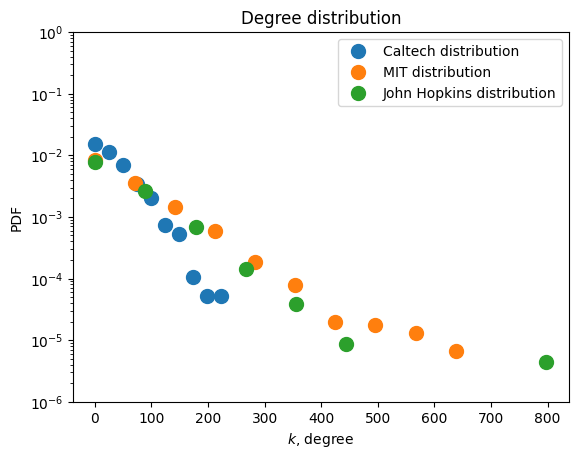

In [3]:
#Creation of the degree distribution
import matplotlib.pyplot as plt
import numpy as np

degree_sequence_1 = sorted([d for n, d in G_Caltech.degree()], reverse=True)  # degree sequence
degree_sequence_2 = sorted([d for n, d in G_MIT.degree()], reverse=True)
degree_sequence_3 = sorted([d for n, d in G_Hopkins.degree()], reverse=True)
hist_1, bin_edges_1 = np.histogram(degree_sequence_1, density=True)
hist_2, bin_edges_2 = np.histogram(degree_sequence_2, density=True)
hist_3, bin_edges_3 = np.histogram(degree_sequence_3, density=True)

plt.semilogy(bin_edges_1[:-1], hist_1, 'o', ms=10, label='Caltech distribution' )
plt.semilogy(bin_edges_2[:-1], hist_2, 'o', ms=10, label='MIT distribution')
plt.semilogy(bin_edges_3[:-1], hist_3, 'o', ms=10, label='John Hopkins distribution')
plt.xlabel(r"$k$, degree ")
plt.ylabel(r"PDF")
plt.ylim(1e-6, 1)
plt.title("Degree distribution")
plt.legend()
### END SOLUTION

Trough these histogram we can deduce that Caltech seems to be a very dense graph whereas those of the MIT and John Hopkins are quite sparse.

### Global and local clustering coefficients for the 3 networks

To perform the analysis, we will transform our graphs into dictionaries

#### Local clustering coefficient
$$LCC(i) = \frac{\text{# of links between neighbors}}{\frac {k(k+1)}{2}}$$


Mean: $$LCC = \frac{1}{N} \sum_{i=1}^{N} LCC(i)$$

In [4]:
#function definition for calculating the local clustering coefficient
def vertexCC(G,v):
    v_neighbors = list(G.neighbors(v))
    edges = 0.0
    for i in range(len(v_neighbors)):
        for j in range(i+1, len(v_neighbors)):
            if v_neighbors[j] in G[v_neighbors[i]]:
                edges += 1
    if edges == 0.0:
        return 0.0
    else:
        return edges / ((len(v_neighbors)**2 - len(v_neighbors))/2)

In [5]:
#Compute the mean local clustering coefficient
def graphCC(G):
    CC = []
    for n in list(G.nodes()):
        CC.append(vertexCC(G,n))
    return np.array(CC).mean()

#### Global clustering coefficient (GCC)
$$GCC = \frac{3 \times \text{# of Triangle}}{\text{# of Triple}}$$

or

$$GCC = 3 \times \frac{\frac{1}{6} Tr(A^3)}{ \frac{1}{2} \times ( \sum_{i,j} [A^2]_{i,j} - Tr(A^2) )}$$

In [6]:
#Create the adjacency graph in order to compute easily the global clustering coefficient
def from_graph_to_adj_matrix(G):
    N = len(list(G.nodes))
    adj_matrix = np.zeros((N,N))
    for v in G.nodes():
        for u in G.neighbors(v):
            adj_matrix[int(u), int(v)] = 1
    return adj_matrix

In [7]:
#Compute the global clustering coefficient
def global_clustering(A):
    from numpy.linalg import matrix_power

    # number of triangle
    num_triangle = (1/6) * np.trace(matrix_power(A, 3))
    A2 = matrix_power(A, 2)
    SumA2 = A2.sum()
    TrA2 = np.trace(A2)
    num_triple = (1/2) * (SumA2 - TrA2)
    return 3 * num_triangle / num_triple

In [8]:
#Computation for our 3 networks
print("Local clustering coefficients: ")
print("Caltech: LCC = ",graphCC(G_Caltech) )
print("MIT: LCC = ",graphCC(G_MIT) )
print("John Hopkins: LCC = ",graphCC(G_Hopkins) )

print("Global clustering coefficients: ")
print("Caltech: GCC = ",global_clustering(from_graph_to_adj_matrix(G_Caltech)))
print("MIT: GCC = ",global_clustering(from_graph_to_adj_matrix(G_MIT)))
print("John Hopkins: GCC = ",global_clustering(from_graph_to_adj_matrix(G_Hopkins)))



Local clustering coefficients: 
Caltech: LCC =  0.4092943904851723
MIT: LCC =  0.271218741950132
John Hopkins: LCC =  0.2683930737129351
Global clustering coefficients: 
Caltech: GCC =  0.2912826901150874
MIT: GCC =  0.18028845093502427
John Hopkins: GCC =  0.19316123901594015


#### Comparison with the edge density

In [9]:
#compute edge density
def edge_density(G):
    N = len(G.nodes)
    return len(G.edges)/(N*(N+1)/2)

In [10]:
#Computation for our 3 networks
print("Edge density of the 3 networks")
print("Caltech: ",edge_density(G_Caltech) )
print("MIT: ",edge_density(G_MIT) )
print("John Hopkins: ",edge_density(G_Hopkins) )

Edge density of the 3 networks
Caltech:  0.056257916335939746
MIT:  0.012114356688180629
John Hopkins:  0.01390483046534002


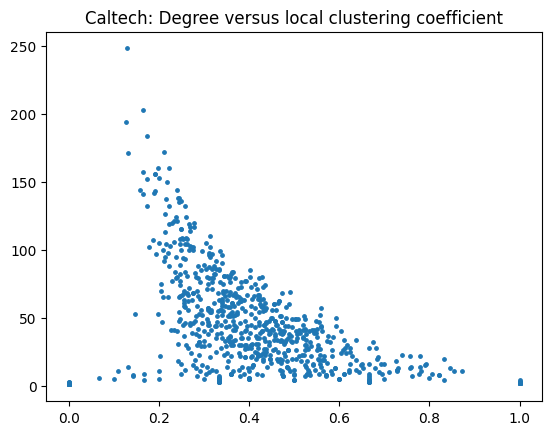

In [11]:
plt.scatter([vertexCC(G_Caltech, v) for v in G_Caltech.nodes], [G_Caltech.degree(v) for v in G_Caltech.nodes], s=6)
plt.title("Caltech: Degree versus local clustering coefficient")
plt.show()

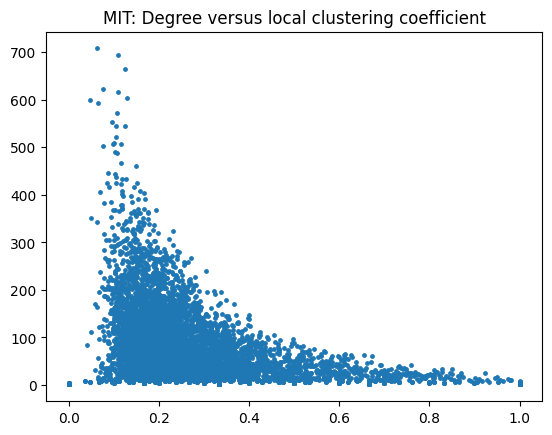

In [12]:
plt.scatter([vertexCC(G_MIT, v) for v in G_MIT.nodes], [G_MIT.degree(v) for v in G_MIT.nodes], s=6)
plt.title("MIT: Degree versus local clustering coefficient")
plt.show()

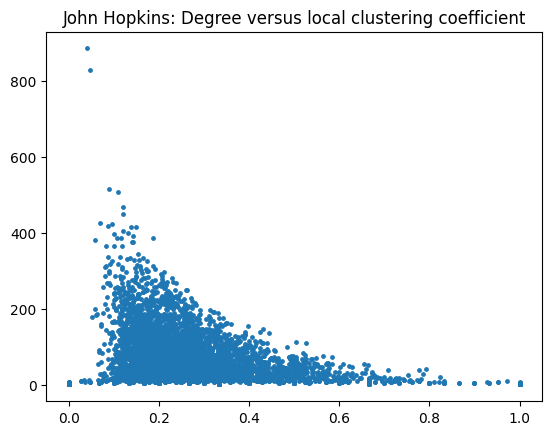

In [13]:
plt.scatter([vertexCC(G_Hopkins, v) for v in G_Hopkins.nodes], [G_Hopkins.degree(v) for v in G_Hopkins.nodes], s=6)
plt.title("John Hopkins: Degree versus local clustering coefficient")
plt.show()

# Part II: Assortativity analysis with the Facebook100 Dataset

## Compute assortativity for different attributes

#### 1. Vertex degreee

In [21]:
#take the networks size on input
networks = []
import os

directory = 'data'
for filename in os.listdir(directory):
    if filename.startswith("B") and filename.startswith("H") and filename.startswith("M") :
        filepath = os.path.join(directory, filename)
        filepath_str = str(filepath)
        G_filename = nx.read_gml(filepath_str)
        networks += [G_filename]

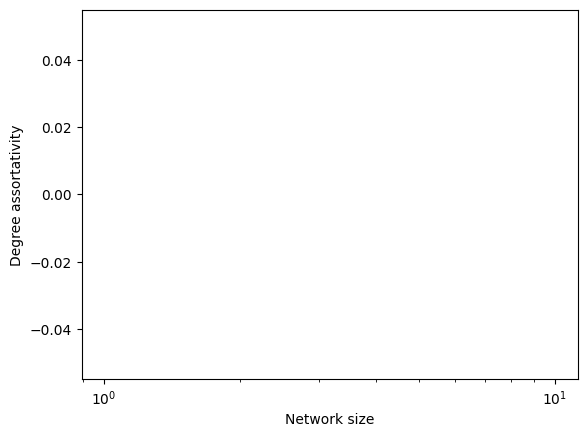

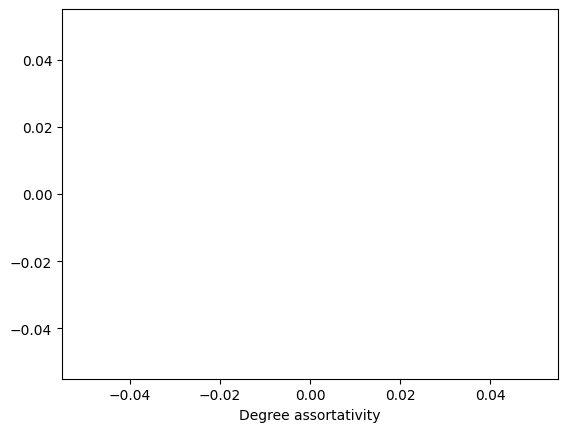

In [22]:
#Plot the degree assortativity

fig1, ax1 = plt.subplots()
ax1.scatter([len(network.nodes) for network in networks], [nx.degree_assortativity_coefficient(G) for G in networks])

# Set logarithmic scale on the x variable
ax1.set_xscale("log")

ax1.set_xlabel("Network size")
ax1.set_ylabel("Degree assortativity")


fig2, ax2 = plt.subplots()
ax2.plot([nx.degree_assortativity_coefficient(G) for G in networks])
ax2.set_xlabel("Degree assortativity")



plt.show()

In [ ]:

# List of vertex attributes to plot
vertex_attributes = ['dorm', 'major', 'gender', 'student_fac']

# Plot for each vertex attribute
for attr in vertex_attributes:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot of assortativity vs network size
    sizes = [len(G.nodes()) for G in networks]
    assortativities = [nx.attribute_assortativity_coefficient(G, attr) for G in networks]
    ax[0].scatter(sizes, assortativities)
    ax[0].set_xscale('log')
    ax[0].set_xlabel('Network Size')
    ax[0].set_ylabel('Assortativity')
    ax[0].axhline(y=0, color='gray', linestyle='--')
    ax[0].set_title(f'{attr.capitalize()} Assortativity vs Network Size')

    # Histogram or density plot of assortativity values
    ax[1].hist(assortativities, bins=20, density=True, alpha=0.6)
    ax[1].set_xlabel('Assortativity')
    ax[1].set_ylabel('Density')
    ax[1].axvline(x=0, color='gray', linestyle='--')
    ax[1].set_title(f'{attr.capitalize()} Assortativity Distribution')

    plt.show()

# Part III: Link prediction

In [15]:
from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np
import progressbar


class LinkPrediction(ABC):
    def __init__(self, graph):
        """
        Constructor

        Parameters
        ----------
        graph : Networkx graph
        """
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        """
        Return the neighbors list of a node

        Parameters
        ----------
        v : int
            node id

        Return
        ------
        neighbors_list : python list
        """
        neighbors_list = self.graph.neighbors(v)
        return list(neighbors_list)

    @abstractmethod
    def fit(self):
        raise NotImplementedError("Fit must be implemented")

class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors, self).__init__(graph)

    def fit(self):
        """
        Compute the common neighbors metric for all pairs of nodes
        """
        scores = {}
        pairs = []
        nodes = list(self.graph.nodes())

        # Generate all pairs of nodes
        for i in range(self.N):
            for j in range(i+1, self.N):
                pairs.append((nodes[i], nodes[j]))

        # Compute common neighbors for each pair of nodes
        for pair in progressbar.progressbar(pairs):
            u, v = pair
            cn = nx.common_neighbors(self.graph, u, v)
            cn_score = len(cn)
            scores[pair] = cn_score

        return scores

class Jaccard(LinkPrediction):
    def __init__(self, graph):
        super(Jaccard, self).__init__(graph)

    def fit(self):
        """
        Compute the Jaccard similarity coefficient for all pairs of nodes
        """
        scores = {}
        pairs = []
        nodes = list(self.graph.nodes())

        # Generate all pairs of nodes
        for i in range(self.N):
            for j in range(i+1, self.N):
                pairs.append((nodes[i], nodes[j]))

        # Compute Jaccard similarity coefficient for each pair of nodes
        for pair in progressbar.progressbar(pairs):
            u, v = pair
            u_neighbors = set(self.neighbors(u))
            v_neighbors = set(self.neighbors(v))
            jaccard_score = len(u_neighbors.intersection(v_neighbors)) / len(u_neighbors.union(v_neighbors))
            scores[pair] = jaccard_score

        return scores

class AdamicAdar(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdar, self).__init__(graph)

    def fit(self):
        """
        Compute the Adamic/Adar index for all pairs of nodes
        """
        scores = {}
        pairs = []
        nodes = list(self.graph.nodes())

        # Generate all pairs of nodes
        for i in range(self.N):
            for j in range(i+1, self.N):
                pairs.append((nodes[i], nodes[j]))

        # Compute Adamic/Adar index for each pair of nodes
        for pair in progressbar.progressbar(pairs):
            u, v = pair
            cn = nx.common_neighbors(self.graph, u, v)
            aa_score = 0
            for w in cn:
                aa_score += 1 / np.log(len(self.neighbors(w)))
            scores[pair] = aa_score

        return scores



# Find missing labels with the label propagation algorithms

In [57]:
#label propagation algorithm
import torch
import networkx as nx

class LabelPropagation:
    def __init__(self, graph):
        self.graph = graph
        self.node_labels = None

    def fit(self, max_iter=100):
        # Convert the graph to a PyTorch tensor
        A = nx.adjacency_matrix(self.graph).toarray()
        A = torch.tensor(A)

        # Initialize the node labels randomly
        n = A.shape[0]
        self.node_labels = torch.arange(n)

        # Run the Label Propagation algorithm
        for i in range(max_iter):
            # Compute the label distributions for each node
            label_distributions = torch.mm(A, torch.nn.functional.one_hot(self.node_labels, num_classes=n))
            label_distributions /= torch.sum(label_distributions, dim=1, keepdim=True)

            # Update the node labels
            self.node_labels = torch.argmax(label_distributions, dim=1)

        return self.node_labels


In [23]:
networks_2 = []
import os

directory = 'data'
for filename in os.listdir(directory):
    if filename.startswith("U"):
        filepath = os.path.join(directory, filename)
        filepath_str = str(filepath)
        G_filename = nx.read_gml(filepath_str)
        networks_2 += [G_filename]

In [45]:
G_test = networks_2[0]
print(G_test.nodes.data("gender"))

[('0', 2), ('1', 1), ('2', 2), ('3', 1), ('4', 2), ('5', 2), ('6', 2), ('7', 2), ('8', 1), ('9', 2), ('10', 2), ('11', 0), ('12', 2), ('13', 2), ('14', 1), ('15', 2), ('16', 2), ('17', 1), ('18', 2), ('19', 1), ('20', 1), ('21', 2), ('22', 2), ('23', 1), ('24', 1), ('25', 1), ('26', 2), ('27', 1), ('28', 1), ('29', 0), ('30', 2), ('31', 1), ('32', 1), ('33', 2), ('34', 0), ('35', 2), ('36', 1), ('37', 2), ('38', 2), ('39', 1), ('40', 2), ('41', 2), ('42', 2), ('43', 1), ('44', 1), ('45', 2), ('46', 1), ('47', 2), ('48', 0), ('49', 2), ('50', 1), ('51', 1), ('52', 0), ('53', 2), ('54', 1), ('55', 2), ('56', 2), ('57', 1), ('58', 2), ('59', 1), ('60', 2), ('61', 1), ('62', 2), ('63', 2), ('64', 2), ('65', 1), ('66', 1), ('67', 1), ('68', 1), ('69', 1), ('70', 2), ('71', 1), ('72', 2), ('73', 1), ('74', 1), ('75', 2), ('76', 0), ('77', 1), ('78', 1), ('79', 2), ('80', 2), ('81', 1), ('82', 1), ('83', 2), ('84', 1), ('85', 1), ('86', 2), ('87', 1), ('88', 2), ('89', 1), ('90', 1), ('91', 1

In [46]:
import random
def remove_attributes(G, attribute, proportion):
    new_G = G.copy()
    index_nodes = list(new_G.nodes)
    chosen_nodes = random.sample(index_nodes, k=int(proportion*len(index_nodes)))
    for i in chosen_nodes:
        new_G.nodes[i][attribute] = None
    return new_G

In [48]:
def recover_attributes(new_G, attribute):
    lp = LabelPropagation(new_G)
    node_labels = lp.fit()
    labels = []
    for i in node_labels:
        if i not in labels:
            labels += [i]
    for i in labels:
        community = [ j for j in G.nodes if new_G.nodes.data(attribute)[j] == i ]
        the_one = None
        for node in community:
            if node[attribute] != None:
                the_one = node[attribute]
            else:
                node[attribute] = the_one
    return new_G


In [49]:
new_G_test = remove_attributes(G_test, "gender", 0.1)
print(new_G_test.nodes.data("gender"))

[('0', 2), ('1', 1), ('2', 2), ('3', 1), ('4', 2), ('5', None), ('6', 2), ('7', 2), ('8', 1), ('9', 2), ('10', 2), ('11', 0), ('12', 2), ('13', 2), ('14', 1), ('15', 2), ('16', 2), ('17', 1), ('18', 2), ('19', 1), ('20', 1), ('21', 2), ('22', 2), ('23', 1), ('24', 1), ('25', 1), ('26', 2), ('27', 1), ('28', 1), ('29', 0), ('30', 2), ('31', 1), ('32', 1), ('33', 2), ('34', None), ('35', None), ('36', 1), ('37', 2), ('38', None), ('39', 1), ('40', 2), ('41', 2), ('42', 2), ('43', 1), ('44', None), ('45', 2), ('46', None), ('47', 2), ('48', 0), ('49', 2), ('50', 1), ('51', 1), ('52', 0), ('53', 2), ('54', 1), ('55', 2), ('56', None), ('57', 1), ('58', 2), ('59', 1), ('60', 2), ('61', 1), ('62', 2), ('63', 2), ('64', 2), ('65', 1), ('66', 1), ('67', None), ('68', 1), ('69', 1), ('70', 2), ('71', 1), ('72', 2), ('73', 1), ('74', 1), ('75', 2), ('76', None), ('77', 1), ('78', 1), ('79', 2), ('80', 2), ('81', 1), ('82', 1), ('83', 2), ('84', 1), ('85', 1), ('86', 2), ('87', 1), ('88', None), 

In [ ]:
new_G_test_recover = recover_attributes(new_G_test, "gender")

In [ ]:
print(new_G_test_recover.nodes.data("gender"))